In [2]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os

In [4]:
import glob
import cPickle as pickle

In [5]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [6]:
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/RESULTS/'
RESULTS_DIR2 = '/n/regal/pfister_lab/PERCEPTION/RESULTS_FROM_SCRATCH/'

In [6]:
for subdir, _, _ in os.walk(RESULTS_DIR+'/C.Figure12.data_to_bars'):
#     print subdir
    if len(subdir.split('/')) == 9:
      if len(os.listdir(subdir)) != 24:
        print subdir, len(os.listdir(subdir))
        
#         classifier = subdir.split('/')[-1]
#         dataset = subdir.split('/')[-2]
#         experiment = subdir.split('/')[-3]
        
#         print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch'

In [9]:
for subdir, _, _ in os.walk(RESULTS_DIR2+'/C.Figure12.data_to_framed_rectangles'):
#     print subdir
    if len(subdir.split('/')) == 9:
      if len(os.listdir(subdir)) != 24:
        print subdir, len(os.listdir(subdir))
        
#         classifier = subdir.split('/')[-1]
#         dataset = subdir.split('/')[-2]
#         experiment = subdir.split('/')[-3]
        
#         print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch'

/n/regal/pfister_lab/PERCEPTION/RESULTS_FROM_SCRATCH//C.Figure12.data_to_framed_rectangles/XCEPTION 8
/n/regal/pfister_lab/PERCEPTION/RESULTS_FROM_SCRATCH//C.Figure12.data_to_framed_rectangles/VGG19 8


In [7]:
experiment = 'C.Figure12.data_to_bars'
e_dir = os.path.join(RESULTS_DIR, experiment)
e2_dir = os.path.join(RESULTS_DIR2, experiment)
datasets = sorted(os.listdir(e_dir))

bar_stats = [None]*6

classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
for i,c in enumerate(classifiers):
    
    bar_stats[i] = []
    c_dir = os.path.join(e_dir, c)

    stats_files = glob.glob(c_dir+'/*.p')
    stats_per_c = []
#     print stats_files

    for s in stats_files:
        
        with open(s, 'r') as f:
            stats = pickle.load(f)
        stats_per_c.append(stats)
#         print stats['time']

    bar_stats[i].append(stats_per_c)
    
classifiers2 = ['VGG19', 'XCEPTION']
for i,c in enumerate(classifiers2):
    
    bar_stats[i+4] = []
    c_dir = os.path.join(e2_dir, c)

    stats_files = glob.glob(c_dir+'/*.p')
    stats_per_c = []
#     print stats_files

    for s in stats_files:
        
        with open(s, 'r') as f:
            stats = pickle.load(f)
        stats_per_c.append(stats)
#         print stats['time']

    bar_stats[i+4].append(stats_per_c)
            
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

In [8]:
len(bar_stats[0][0])

12

In [9]:
experiment = 'C.Figure12.data_to_framed_rectangles'
e_dir = os.path.join(RESULTS_DIR, experiment)
e2_dir = os.path.join(RESULTS_DIR2, experiment)
datasets = sorted(os.listdir(e_dir))

rect_stats = [None]*6

classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
for i,c in enumerate(classifiers):
    
    rect_stats[i] = []
    c_dir = os.path.join(e_dir, c)

    stats_files = glob.glob(c_dir+'/*.p')
    stats_per_c = []
#     print stats_files

    for s in stats_files:
        
        with open(s, 'r') as f:
            stats = pickle.load(f)
        stats_per_c.append(stats)
#         print stats['time']

    rect_stats[i].append(stats_per_c)
    
classifiers = ['VGG19', 'XCEPTION']
for i,c in enumerate(classifiers):
    
    rect_stats[i+4] = []
    c_dir = os.path.join(e2_dir, c)

    stats_files = glob.glob(c_dir+'/*.p')
    stats_per_c = []
#     print stats_files

    for s in stats_files:
        
        with open(s, 'r') as f:
            stats = pickle.load(f)
        stats_per_c.append(stats)
#         print stats['time']

    rect_stats[i+4].append(stats_per_c)
            
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

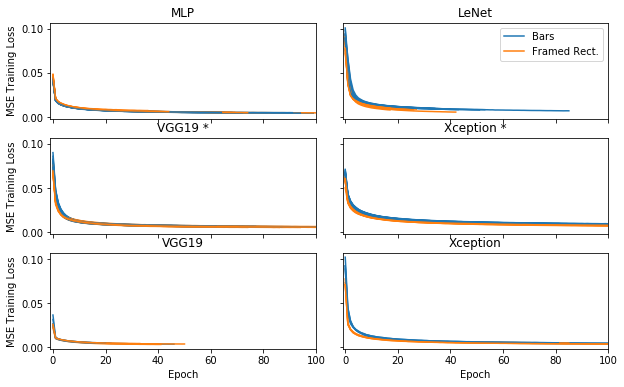

In [31]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19 *', 'Xception *', 'VGG19', 'Xception']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(3, 2, width_ratios=[1,1], hspace=.2, wspace=.1)

axes = [None]*6

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Training Loss')        
    elif i == 1 or i==3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[i].get_yticklabels(), visible=False)
        plt.setp(axes[i].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2 or i == 4:
        
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        

        if i == 2:
            plt.setp(axes[i].get_xticklabels(), visible=False)  
        
        
        plt.ylabel('MSE Training Loss')
        if i!=2:
            plt.xlabel('Epoch')                
    elif i == 5:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[5].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')    

    for sample in range(len(bar_stats[i][0])):
        
        # grab sample from both
        bar_loss = bar_stats[i][0][sample]['loss']
        rect_loss = rect_stats[i][0][sample]['loss']
        if sample == 0:
            # only label the first
            plot(bar_loss, label='Bars', color='C0')
            plot(rect_loss, label='Framed Rect.', color='C1')
        else:
            # but use the same colors for all
            plot(bar_loss, color='C0')
            plot(rect_loss, color='C1')
            
    plt.xlim(-1,100)
    plt.title(c)


    if i == 1:
        plt.legend()
        
plt.savefig('../PAPER/gfx/figure12_training_loss.pdf', bbox_inches='tight', pad_inches=0)

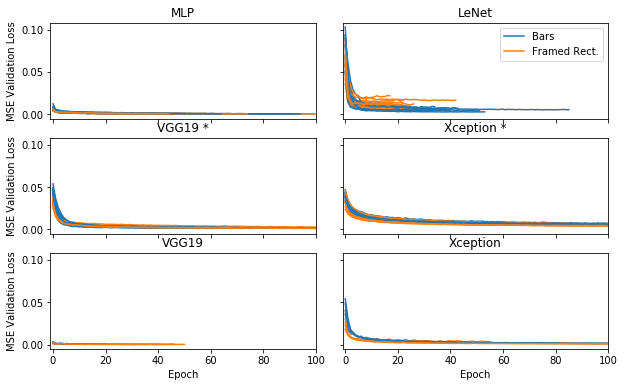

In [32]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19 *', 'Xception *', 'VGG19', 'Xception']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(3, 2, width_ratios=[1,1], hspace=.2, wspace=.1)

axes = [None]*6

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Validation Loss')        
    elif i == 1 or i==3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[i].get_yticklabels(), visible=False)
        plt.setp(axes[i].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2 or i == 4:
        
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        

        if i == 2:
            plt.setp(axes[i].get_xticklabels(), visible=False)  
        
        
        plt.ylabel('MSE Validation Loss')
        if i!=2:
            plt.xlabel('Epoch')                
    elif i == 5:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[5].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')    

    for sample in range(len(bar_stats[i][0])):
        
        # grab sample from both
        bar_loss = bar_stats[i][0][sample]['val_loss']
        rect_loss = rect_stats[i][0][sample]['val_loss']
        if sample == 0:
            # only label the first
            plot(bar_loss, label='Bars', color='C0')
            plot(rect_loss, label='Framed Rect.', color='C1')
        else:
            # but use the same colors for all
            plot(bar_loss, color='C0')
            plot(rect_loss, color='C1')
            
    plt.xlim(-1,100)
    plt.title(c)


    if i == 1:
        plt.legend()
        
plt.savefig('../PAPER/gfx/figure12_val_loss.pdf', bbox_inches='tight', pad_inches=0)

In [11]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [12]:
import sklearn.metrics


In [13]:
def grab(which, values=1):

#     which = 'bars'
    # values = 2

    RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/CP_USERSTUDY/RESULTS/'
    
    results = [None]*13

    with open(RESULTS_DIR + which + '.csv', 'r') as f:
        lines = f.readlines()

    rej_cnt = 0
    for l in lines[1:]:
        if l.find('Rejected') != -1:
            rej_cnt += 1
            continue
        l_split = l.strip("\r\n").split(',')
#         print l_split
#         print l_split[-1-values]
        stimuli = int(l_split[-1 - values].split('/')[-1].split('.')[0])
        answer = [int(l_split[-1 -x].strip('\r\n').strip('"')) for x in range(values)]
        answer.reverse()

        if not results[stimuli]:
            results[stimuli] = []
        results[stimuli].append(answer)
    #         print stimuli, answer

#     print 'Rejected', rej_cnt
    
    return results

def merge(a1, a2):
    
    results = []
    for i,a in enumerate(a1):
        
         results.append(a1[i]+a2[i])
            
    assert len(results) == 13

    return results

def grabbygrab(which, values=1, GT_DIR='/n/regal/pfister_lab/PERCEPTION/CP_USERSTUDY/Figure1/'):
    
    merged = merge(grab(which, values), grab(which+'2', values))
#     print merged
    if which == 'bars' or which == 'framed':
        gt_file = GT_DIR  + '/labels.p' 
    else:
        gt_file = GT_DIR + which + '/labels.p' 
    with open(gt_file, 'r') as f:
        labels = pickle.load(f)
        
#     print labels
    labels = np.array(labels).astype(np.float)
    
#     if values == 1:
    max_label = labels.max()
    min_label = labels.min()
#     print min_label, max_label
#     elif values == 2:
#         max_label1 = max(labels)
        
    if which=='bars' or which=='framed':
        labels == labels.ravel()
#         min_label = 0
        

    no_users = len(merged[0])
    user_results = []
    for u in range(no_users):
        
        # grab samples for this user
        samples = []
        for stimuli in merged[3:]:
            
            user_val = stimuli[u]
            
            samples.append(user_val)
            
        if values == 1:
            user_results.append(np.array(samples).astype(np.float).ravel())
        elif values == 2:
            user_results.append(np.array(samples).astype(np.float))
        
    #
    # now normalize our samples
    #
    
    max_labels = {
        'position_common_scale': [0,60],
        'position_non_aligned_scale': [0,60],
        'length': [1, 60],
        'direction': [0,359],
        'angle': [1,90],
        'area': [3.1415, 5026.4],
        'volume': [1, 8000],
        'curvature': [0,.3],
        'shading': [0,100],
        'bars': [1,60],
        'framed': [1,60],
        'weber10': [1,10],
        'weber100': [1,10],
        'weber1000': [1,10]
    }
    
    min_label = max_labels[which][0]
    max_label = max_labels[which][1]
    
#     min_label = 0
#     max_label = 100
    for u in range(no_users):
        
        
        user_results[u] -= min_label
        user_results[u] /= (max_label - min_label)
        
    # also normalize the labels
    labels -= min_label
    labels /= (max_label - min_label)


        
    
    #
    # now calculate MLAE
    #
    MLAES = []
    AES = []
    for u in range(no_users):
        
        if which == 'curvature':
            user_results[u] /= 100
        
#         MLAE = sklearn.metrics.mean_absolute_error(user_results[u], labels)#np.log2(sklearn.metrics.mean_absolute_error(user_results[u]/100.*100, labels*100)+.125)
        MLAE = np.log2(sklearn.metrics.mean_absolute_error(user_results[u]*100, labels[3:]*100)+.125)
        MLAES.append(MLAE)
        AE = sklearn.metrics.mean_absolute_error(user_results[u]*100, labels[3:]*100)
        AES.append(AE)

#     print labels[0:5], user_results[0][0:5]
    
    
        
    return MLAES, AES
#     print labels, min(labels), max(labels)

In [30]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

/n/home05/haehn/.conda/envs/CP/lib/python2.7/site-packages/ipykernel_launcher.py:67: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


Human value!! 1
1 Human
2 MLP
3 LeNet
4 VGG19 *
5 Xception *
6 VGG19
7 Xception
Human value!! 1
1 Human
2 MLP
3 LeNet
4 VGG19 *
5 Xception *
6 VGG19
7 Xception


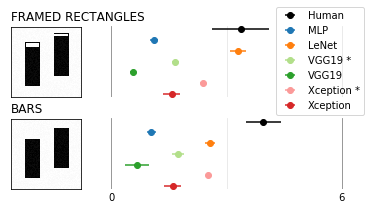

In [31]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

all_data = []
images = []


titles = ['Framed Rectangles', 'Bars']

humans = []

which = ['framed', 'bars']

for w in which:
    MLAE, AE = grabbygrab(w,values=2, GT_DIR='/n/regal/pfister_lab/PERCEPTION/CP_USERSTUDY/Figure12/')
    humans.append(MLAE)


## data
no_samples = len(bar_stats[0][0])
bar_data = [None]*6
rect_data = [None]*6
classifiers = ['MLP', 'LeNet', 'VGG19 *', 'Xception *', 'VGG19', 'Xception']
for i, c in enumerate(classifiers):

    bar_mlae_s = []
    rect_mlae_s = []
    
    for sample in range(len(bar_stats[i][0])):

        # grab sample from both
        bar_mlae = bar_stats[i][0][sample]['MLAE']
        rect_mlae = rect_stats[i][0][sample]['MLAE']
#         print i, sample, bar_mlae, pie_mlae
        bar_mlae_s.append(bar_mlae)
        rect_mlae_s.append(rect_mlae)
        
    bar_data[i] = bar_mlae_s
    rect_data[i] = rect_mlae_s
    
# swap vgg19 and xception *
rect_data[3], rect_data[4] = rect_data[4], rect_data[3]
bar_data[3], bar_data[4] = bar_data[4], bar_data[3]
    
all_data = [rect_data, bar_data]


## images
data, labels, parameters = C.Figure12.generate_datapoint()
data = [20, 23, 55, 60, 10, 57 ]
bar_image = C.Figure12.data_to_bars(data)
rect_image = C.Figure12.data_to_framed_rectangles(data)

bar_image = bar_image.astype(np.float32)
bar_image += np.random.uniform(0, 0.05,(100,100))

rect_image = rect_image.astype(np.float32)
rect_image += np.random.uniform(0, 0.05,(100,100))
images = [rect_image, bar_image]



fig = plt.figure(figsize=(6,3), facecolor='white')
gs = gridspec.GridSpec(2, 2, width_ratios=[.3,1], hspace=.3)

j = 0 # grid index (running)

rows = 2
for row in range(rows):
    
    for i, c in enumerate(['Image']+['Human']+classifiers):
        

        
        if i==0:
            # this is the image

            fig = plt.subplot(gs[j])
            j += 1
            
            plt.title(titles[row].upper(), loc='left')

            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()

            ax.set_xticklabels('')
            ax.set_yticklabels('')
            
            plt.imshow(images[row], cmap='Greys', interpolation='none')
            
            continue

        #

#         if row == 0:
#             plt.title(c)

        if i==1:

            fig = plt.subplot(gs[j])
            j += 1
        
#             if row > 4:
#                 continue
        
            # this is human
#             means = human_values[row][0]
#             confidence = human_values[row][1]
            
#             errorbars = plt.errorbar(means, 6-i, xerr=confidence, fmt='o',  color='black', label='Human')
#             continue


        if c == 'Human':
            print 'Human value!!', i
            data = [humans[row]]
#             print data
        else:
            data = [all_data[row][i-2]]
#         print data
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
#         print sorted_data
        quarter = len(sorted_data[0]) / 4 # always floor

        data = [r[quarter:-quarter] for r in sorted_data]
        
        means = [np.mean(r) for r in data]
        
#         confidence = [1.96*np.std(r) for r in data]
        confidence = [1.96*bs.bootstrap(np.array(r), stat_func=bs_stats.std).value for r in data if len(r) != 0]


        y_pos = 6-i#range(len(means))


        plt.xlim(0,6.1)

        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
#         if row != 0:
        ax.get_yaxis().set_ticks([])
#         else:
#     #             print labels
#             ax.get_yaxis().set_ticks(range(len(labels))) # we set the labels here
#             ax.get_yaxis().set_ticklabels(labels)

        ax.get_xaxis().set_ticks(np.arange(0,7,6)) # mark the tange
        ax.get_xaxis().set_ticks(np.arange(3,3.1), minor=True) # mark the center
        ax.tick_params(axis=u'both', which=u'both',length=0)
        
        # remove tick marks
        if row == 0:
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none')

        # grid lines for X
        plt.grid(True, color='gray', which='major', axis='x', alpha=1)
        plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)
        
        c_color = 'C'+str(i-2)
        print i, c
        if i == 1:
            #human
            c = 'Human'
            c_color = '#000000'
    
        elif i == 4:
            # vgg19 imagenet
#             c = c+' *'
            c_color = '#b2df8a'
        elif i == 5:
            # vgg from scratch
#             c = c+'vg s'
            c = 'VGG19'
            c_color = 'C2'
        elif i == 6:
            # xcpetion imagenet
            c = 'Xception *'
            c_color = '#fb9a99'
        elif i == 7:
            # xception from scratch
#             c = c+'x sc'
#             c = 'Xception'
            c_color = 'C3'

        errorbars = plt.errorbar(means, y_pos, xerr=confidence, fmt='o', label=c, color=c_color)
plt.legend(loc='right', bbox_to_anchor=(1.1, 1.81))
plt.savefig('../PAPER/gfx/figure12_mlae_better_all_NEW.pdf', bbox_inches='tight', pad_inches=0)

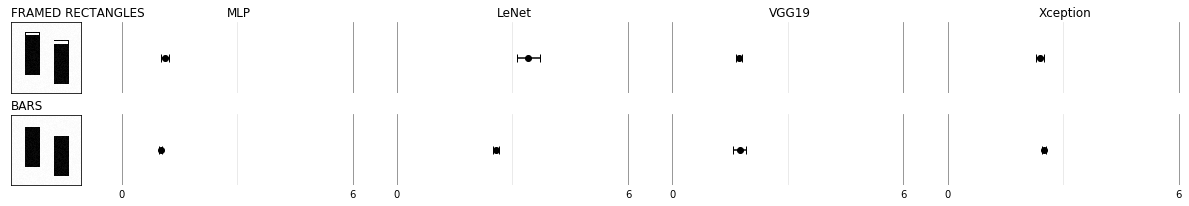

In [54]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

all_data = []
images = []

titles = ['Framed Rectangles', 'Bars']

## data
no_samples = len(bar_stats[0][0])
bar_data = [None]*4
rect_data = [None]*4
classifiers = ['MLP', 'LeNet', 'VGG19', 'Xception']
for i, c in enumerate(classifiers):

    bar_mlae_s = []
    rect_mlae_s = []
    
    for sample in range(no_samples):

        # grab sample from both
        bar_mlae = bar_stats[i][0][sample]['MLAE']
        rect_mlae = rect_stats[i][0][sample]['MLAE']
#         print i, sample, bar_mlae, pie_mlae
        bar_mlae_s.append(bar_mlae)
        rect_mlae_s.append(rect_mlae)
        
    bar_data[i] = bar_mlae_s
    rect_data[i] = rect_mlae_s
    
all_data = [rect_data, bar_data]

## images
data, labels, parameters = C.Figure12.generate_datapoint()
bar_image = C.Figure12.data_to_bars(data)
rect_image = C.Figure12.data_to_framed_rectangles(data)

bar_image = bar_image.astype(np.float32)
bar_image += np.random.uniform(0, 0.05,(100,100))

rect_image = rect_image.astype(np.float32)
rect_image += np.random.uniform(0, 0.05,(100,100))
images = [rect_image, bar_image]



fig = plt.figure(figsize=(21,3), facecolor='white')
gs = gridspec.GridSpec(2, 5, width_ratios=[.3,1,1,1,1], hspace=.3)

j = 0 # grid index (running)

rows = 2
for row in range(rows):
    
    for i, c in enumerate(['Image']+classifiers):
        
        fig = plt.subplot(gs[j])
        j += 1
        
        if i==0:
            # this is the image

            plt.title(titles[row].upper(), loc='left')

            
            ax = plt.gca()
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none') 
            plt.tight_layout()

            ax.set_xticklabels('')
            ax.set_yticklabels('')
            
            plt.imshow(images[row], cmap='Greys', interpolation='none')
            
            continue

        #

        if row == 0:
            plt.title(c)

    
        data = [all_data[row][i-1]]
#         print data
        # grab the MIDMEANS
        sorted_data = [sorted(r) for r in data]
#         print sorted_data
        quarter = len(sorted_data[0]) / 4 # always floor

        data = [r[quarter:-quarter] for r in sorted_data]
        
        means = [np.mean(r) for r in data]
        
        confidence = [1.96*np.std(r) for r in data]


        y_pos = range(len(means))


        plt.xlim(0,6.1)

        ax = plt.gca()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
#         if row != 0:
        ax.get_yaxis().set_ticks([])
#         else:
#     #             print labels
#             ax.get_yaxis().set_ticks(range(len(labels))) # we set the labels here
#             ax.get_yaxis().set_ticklabels(labels)

        ax.get_xaxis().set_ticks(np.arange(0,7,6)) # mark the tange
        ax.get_xaxis().set_ticks(np.arange(3,3.1), minor=True) # mark the center
        ax.tick_params(axis=u'both', which=u'both',length=0)
        
        # remove tick marks
        if row == 0:
            from matplotlib.ticker import NullFormatter
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none')

        # grid lines for X
        plt.grid(True, color='gray', which='major', axis='x', alpha=1)
        plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)

        errorbars = plt.errorbar(means, y_pos, xerr=confidence, fmt='o', color='black', capsize=4)
plt.savefig('../PAPER/gfx/figure12_mlae.pdf', bbox_inches='tight', pad_inches=0)

In [37]:
np.mean([rect_data[0][v]['MLAE'] for v in range(6)])

IndexError: invalid index to scalar variable.

In [35]:
np.mean([bar_data[1][0][v]['MLAE'] for v in range[6]])

TypeError: 'builtin_function_or_method' object has no attribute '__getitem__'

In [47]:
rect_all_runs = []
for r in rect_data:
    for e in r:
        rect_all_runs.append(e)
        
print '$',np.round(np.mean(rect_all_runs),3),'$', '($SD=',np.round(np.std(rect_all_runs),3),'$)'

$ 1.982 $ ($SD= 0.89 $)


In [49]:
bar_all_runs = []
for r in bar_data:
    for e in r:
        bar_all_runs.append(e)
        
print '$',np.round(np.mean(bar_all_runs),3),'$', '($SD=',np.round(np.std(bar_all_runs),3),'$)'

 $ 1.867 $ ($SD= 0.709 $)


In [45]:
from pyvttbl import DataFrame
from scipy.stats import ttest_ind, ttest_ind_from_stats

In [46]:
# test if the difference between types was significant

df = DataFrame()
df['data'] = bar_all_runs + rect_all_runs
df['conditions'] = ['Bars']*len(bar_all_runs)+['Rect']*len(rect_all_runs)
aov_pyvttbl = df.anova1way('data', 'conditions')
print aov_pyvttbl

Anova: Single Factor on data

SUMMARY
Groups   Count     Sum     Average   Variance 
Bars        56   104.547     1.867      0.513 
Rect        56   111.011     1.982      0.807 

O'BRIEN TEST FOR HOMOGENEITY OF VARIANCE
Source of Variation     SS     df     MS       F     P-value   eta^2   Obs. power 
Treatments             2.425     1   2.425   4.613     0.034   0.040        0.558 
Error                 57.810   110   0.526                                        
Total                 60.235   111                                                

ANOVA
Source of Variation     SS     df     MS       F     P-value   eta^2   Obs. power 
Treatments             0.373     1   0.373   0.566     0.454   0.005        0.117 
Error                 72.562   110   0.660                                        
Total                 72.936   111                                                

POSTHOC MULTIPLE COMPARISONS

Tukey HSD: Table of q-statistics
       Bars     Rect   
Bars   0      1.064 

In [ ]:
for i,a in enumerate(all_data_per_type):
    for j,b in enumerate(all_data_per_type):
        
        if i == j:
            continue

        df = DataFrame()
        df['data'] = all_data_per_type[i] + all_data_per_type[j]
        df['conditions'] = len(all_data_per_type[i])*['Type'+str(i+1)]+len(all_data_per_type[j])*['Type'+str(j+1)]

        aov_pyvttbl = df.anova1way('data', 'conditions')
        
        if aov_pyvttbl.get('p') < .05:
#             print aov_pyvttbl
            t, p = ttest_ind(all_data_per_type[i], all_data_per_type[j], equal_var=False)
            print i,j, t,p

In [57]:
vgg_bar = bar_data[0]
print 'bar', '$',np.round(np.mean(vgg_bar),3),'$', '($SD=',np.round(np.std(vgg_bar),3),'$)'
vgg_rect = rect_data[0]
print 'rect', '$',np.round(np.mean(vgg_rect),3),'$', '($SD=',np.round(np.std(vgg_rect),3),'$)'


bar $ 1.047 $ ($SD= 0.135 $)
rect $ 1.118 $ ($SD= 0.115 $)


In [55]:
df = DataFrame()
df['data'] = vgg_bar+vgg_rect
df['conditions'] = len(vgg_bar)*['Bar']+len(vgg_rect)*['Rect']

aov_pyvttbl = df.anova1way('data', 'conditions')
print aov_pyvttbl
if aov_pyvttbl.get('p') < .05:
#             print aov_pyvttbl
    t, p = ttest_ind(all_data_per_type[i], all_data_per_type[j], equal_var=False)
    print i,j, t,p

Anova: Single Factor on data

SUMMARY
Groups   Count    Sum    Average   Variance 
Bar          4   2.940     0.735      0.224 
Rect         4   2.379     0.595      0.067 

O'BRIEN TEST FOR HOMOGENEITY OF VARIANCE
Source of Variation    SS     df    MS       F     P-value   eta^2   Obs. power 
Treatments            0.049    1   0.049   1.094     0.336   0.154        0.156 
Error                 0.268    6   0.045                                        
Total                 0.317    7                                                

ANOVA
Source of Variation    SS     df    MS       F     P-value   eta^2   Obs. power 
Treatments            0.039    1   0.039   0.271     0.621   0.043        0.079 
Error                 0.874    6   0.146                                        
Total                 0.913    7                                                

POSTHOC MULTIPLE COMPARISONS

Tukey HSD: Table of q-statistics
       Bar     Rect   
Bar    0     0.736 ns 
Rect         0      

In [56]:
0.225*0.225

0.050625

In [63]:
np.log2(10)

3.3219280948873622